## Classification Project

In [14]:
from warnings import filterwarnings
filterwarnings('ignore')

##  Read the train Dataset

In [15]:
import pandas as pd
df = pd.read_csv('train.csv')
df.head()

,id,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,0,L50096,L,300.6,309.6,1596,36.1,140,0,0,0,0,0,0
1,1,M20343,M,302.6,312.1,1759,29.1,200,0,0,0,0,0,0
2,2,L49454,L,299.3,308.5,1805,26.5,25,0,0,0,0,0,0
3,3,L53355,L,301.0,310.9,1524,44.3,197,0,0,0,0,0,0
4,4,M24050,M,298.0,309.0,1641,35.4,34,0,0,0,0,0,0


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136429 entries, 0 to 136428
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       136429 non-null  int64  
 1   Product ID               136429 non-null  object 
 2   Type                     136429 non-null  object 
 3   Air temperature [K]      136429 non-null  float64
 4   Process temperature [K]  136429 non-null  float64
 5   Rotational speed [rpm]   136429 non-null  int64  
 6   Torque [Nm]              136429 non-null  float64
 7   Tool wear [min]          136429 non-null  int64  
 8   Machine failure          136429 non-null  int64  
 9   TWF                      136429 non-null  int64  
 10  HDF                      136429 non-null  int64  
 11  PWF                      136429 non-null  int64  
 12  OSF                      136429 non-null  int64  
 13  RNF                      136429 non-null  int64  
dtypes: f

## Check missing values in df

In [17]:
df.isna().sum()


id                         0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Machine failure            0
TWF                        0
HDF                        0
PWF                        0
OSF                        0
RNF                        0
dtype: int64

## Seperate X and Y (Drop statistically insignificant)

In [18]:
df.columns

Index(['id', 'Product ID', 'Type', 'Air temperature [K]',
       'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]',
       'Tool wear [min]', 'Machine failure', 'TWF', 'HDF', 'PWF', 'OSF',
       'RNF'],
      dtype='object')

In [19]:
X = df.drop(columns=['id', 'Product ID', 'Machine failure', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF'])
Y = df[['Machine failure']]

In [20]:
X.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min]
0,L,300.6,309.6,1596,36.1,140
1,M,302.6,312.1,1759,29.1,200
2,L,299.3,308.5,1805,26.5,25
3,L,301.0,310.9,1524,44.3,197
4,M,298.0,309.0,1641,35.4,34


In [21]:
Y.head()

,Machine failure
0,0
1,0
2,0
3,0
4,0


## Cat Con Seperation for X

In [22]:
cat = list(X.columns[X.dtypes=='object'])
con = list(X.columns[X.dtypes!='object'])

In [23]:
cat

['Type']

In [24]:
con

['Air temperature [K]',
 'Process temperature [K]',
 'Rotational speed [rpm]',
 'Torque [Nm]',
 'Tool wear [min]']

## Create Sklearn pipeline for feature selection (Ordinal)

In [25]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.compose import ColumnTransformer

In [30]:
num_pipe = Pipeline(steps=[('impute', SimpleImputer(strategy='mean')),
                           ('scaler', StandardScaler())])

cat_pipe = Pipeline(steps=[('impute', SimpleImputer(strategy='most_frequent')),
                           ('ordinal', OrdinalEncoder())])

pre = ColumnTransformer([('num', num_pipe, con),
                         ('cat', cat_pipe, cat)])

In [31]:
X_pre = pre.fit_transform(X)
X_pre

array([[ 0.3958803 , -0.24623038,  0.54541592, -0.49971115,  0.5564169 ,
         1.        ],
       [ 1.46985559,  1.55860483,  1.72030819, -1.32302768,  1.49443273,
         2.        ],
       [-0.30220363, -1.04035788,  2.05187289, -1.62883096, -1.24144677,
         1.        ],
       ...,
       [ 0.34218154,  1.34202461,  0.0264451 , -0.2174312 ,  1.71330309,
         1.        ],
       [ 0.98656671,  0.69228393, -0.52856537,  0.69997864, -0.97567562,
         1.        ],
       [-1.59097397, -1.32913151,  0.26430672, -0.12333789,  1.94780704,
         1.        ]])

In [33]:
cols = pre.get_feature_names_out()
cols

array(['num__Air temperature [K]', 'num__Process temperature [K]',
       'num__Rotational speed [rpm]', 'num__Torque [Nm]',
       'num__Tool wear [min]', 'cat__Type'], dtype=object)

In [35]:
X_pre = pd.DataFrame(X_pre, columns=cols)
X_pre.head()

,num__Air temperature [K],num__Process temperature [K],num__Rotational speed [rpm],num__Torque [Nm],num__Tool wear [min],cat__Type
0,0.395880,-0.246230,0.545416,-0.499711,0.556417,1.0
1,1.469856,1.558605,1.720308,-1.323028,1.494433,2.0
2,-0.302204,-1.040358,2.051873,-1.628831,-1.241447,1.0
3,0.610675,0.692284,0.026445,0.464745,1.447532,1.0
4,-1.000288,-0.679391,0.869773,-0.582043,-1.100744,2.0


## Find Mutual Info Scores and plot them (Do not select any columns) 

In [36]:
from sklearn.feature_selection import mutual_info_classif
mi = mutual_info_classif(X_pre, Y)
mi

array([0.00579068, 0.00211768, 0.01976783, 0.01991176, 0.00712508,
       0.01146408])

In [37]:
mi = pd.Series(mi)
mi.index = X_pre.columns
mi = mi.sort_values(ascending=False)
mi

num__Torque [Nm]                0.019912
num__Rotational speed [rpm]     0.019768
cat__Type                       0.011464
num__Tool wear [min]            0.007125
num__Air temperature [K]        0.005791
num__Process temperature [K]    0.002118
dtype: float64

<Axes: title={'center': 'Mutual Information Scores'}>

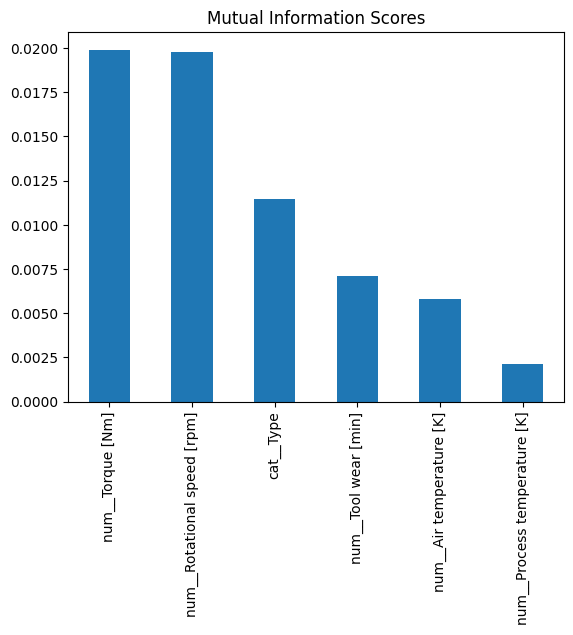

In [38]:
mi.plot(kind='bar', title='Mutual Information Scores')

## Build the final sklearn pipeline (Onehotencoder)

In [47]:
sel_cols = list(mi.index[0:6])
sel_cols

['num__Torque [Nm]',
 'num__Rotational speed [rpm]',
 'cat__Type',
 'num__Tool wear [min]',
 'num__Air temperature [K]',
 'num__Process temperature [K]']

## Extract important column names

In [48]:
sel_cols[0].split('__')[1]

'Torque [Nm]'

In [49]:
imp_cols = []
for i in sel_cols:
    s = i.split('__')[1]
    imp_cols.append(s)

In [50]:
imp_cols

['Torque [Nm]',
 'Rotational speed [rpm]',
 'Type',
 'Tool wear [min]',
 'Air temperature [K]',
 'Process temperature [K]']

In [52]:
X_sel = X[imp_cols]
X_sel

,Torque [Nm],Rotational speed [rpm],Type,Tool wear [min],Air temperature [K],Process temperature [K]
0,36.1,1596,L,140,300.6,309.6
1,29.1,1759,M,200,302.6,312.1
2,26.5,1805,L,25,299.3,308.5
3,44.3,1524,L,197,301.0,310.9
4,35.4,1641,M,34,298.0,309.0
...,...,...,...,...,...,...
136424,37.5,1530,M,210,300.1,311.4
136425,49.1,1447,H,2,297.5,308.5
136426,38.5,1524,L,214,300.5,311.8
136427,46.3,1447,L,42,301.7,310.9


In [54]:
cat_sel = list(X_sel.columns[X_sel.dtypes=='object'])
con_sel = list(X_sel.columns[X_sel.dtypes!='object'])

In [55]:
cat_sel

['Type']

In [56]:
con_sel

['Torque [Nm]',
 'Rotational speed [rpm]',
 'Tool wear [min]',
 'Air temperature [K]',
 'Process temperature [K]']

In [39]:
from sklearn.preprocessing import OneHotEncoder

In [61]:
num_pipe2 = Pipeline(steps=[('impute', SimpleImputer(strategy='mean')),
                            ('scaler', StandardScaler())])

cat_pipe2 = Pipeline(steps=[('impute', SimpleImputer(strategy='most_frequent')),
                            ('ohe', OneHotEncoder(handle_unknown='ignore'))])

pre2 = ColumnTransformer([('num', num_pipe2, con_sel),
                          ('cat', cat_pipe2, cat_sel)])

In [63]:
X_sel_pre = pre2.fit_transform(X_sel)
X_sel_pre

array([[-0.49971115,  0.54541592,  0.5564169 , ...,  0.        ,
         1.        ,  0.        ],
       [-1.32302768,  1.72030819,  1.49443273, ...,  0.        ,
         0.        ,  1.        ],
       [-1.62883096,  2.05187289, -1.24144677, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [-0.2174312 ,  0.0264451 ,  1.71330309, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.69997864, -0.52856537, -0.97567562, ...,  0.        ,
         1.        ,  0.        ],
       [-0.12333789,  0.26430672,  1.94780704, ...,  0.        ,
         1.        ,  0.        ]])

In [64]:
final_cols = pre2.get_feature_names_out()
final_cols

array(['num__Torque [Nm]', 'num__Rotational speed [rpm]',
       'num__Tool wear [min]', 'num__Air temperature [K]',
       'num__Process temperature [K]', 'cat__Type_H', 'cat__Type_L',
       'cat__Type_M'], dtype=object)

In [65]:
X_sel_pre = pd.DataFrame(X_sel_pre, columns=final_cols)
X_sel_pre

,num__Torque [Nm],num__Rotational speed [rpm],num__Tool wear [min],num__Air temperature [K],num__Process temperature [K],cat__Type_H,cat__Type_L,cat__Type_M
0,-0.499711,0.545416,0.556417,0.395880,-0.246230,0.0,1.0,0.0
1,-1.323028,1.720308,1.494433,1.469856,1.558605,0.0,0.0,1.0
2,-1.628831,2.051873,-1.241447,-0.302204,-1.040358,0.0,1.0,0.0
3,0.464745,0.026445,1.447532,0.610675,0.692284,0.0,1.0,0.0
4,-0.582043,0.869773,-1.100744,-1.000288,-0.679391,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...
136424,-0.335048,0.069693,1.650769,0.127386,1.053251,0.0,0.0,1.0
136425,1.029305,-0.528565,-1.601020,-1.268781,-1.040358,1.0,0.0,0.0
136426,-0.217431,0.026445,1.713303,0.342182,1.342025,0.0,1.0,0.0
136427,0.699979,-0.528565,-0.975676,0.986567,0.692284,0.0,1.0,0.0


## Apply train test split

In [66]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X_sel_pre, Y, test_size=0.2, random_state=42)

In [67]:
xtrain.shape

(109143, 8)

In [68]:
xtest.shape

(27286, 8)

##  Algo Evaluation

In [69]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [76]:
dct = {'Logistic' : LinearRegression(),
       'Decision Tree' : DecisionTreeClassifier(),
       'Random Forest' : RandomForestClassifier(),
       'Gradient Boost' : GradientBoostingClassifier()}

In [77]:
dct.items()

dict_items([('Logistic', LinearRegression()), ('Decision Tree', DecisionTreeClassifier()), ('Random Forest', RandomForestClassifier()), ('Gradient Boost', GradientBoostingClassifier())])